In [1]:
import sys
sys.path.append("../")

In [2]:
from src.nnsrc.dense import NeuralNetwork

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [4]:
from matplotlib.pyplot import plot, legend

In [5]:
data = pd.read_csv('../src/data/regression/data.cube.train.100.csv')
X = data[["x"]].values
Y = data["y"].values.reshape(-1,1)

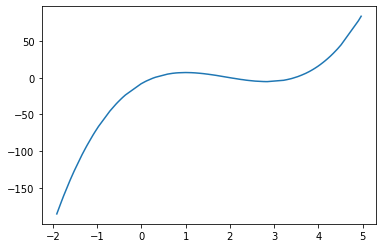

In [6]:
plot(*zip(*sorted(zip(data.x, data.y))))

In [7]:
X_train_scaler = MinMaxScaler((0,1))
Y_train_scaler = MinMaxScaler((0,1))
X_normed = X_train_scaler.fit_transform(X)
y_normed = Y_train_scaler.fit_transform(Y)

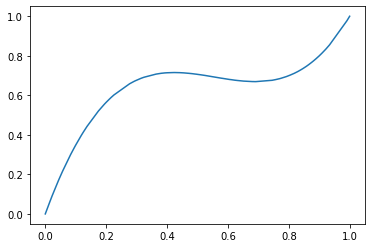

In [8]:
plot(*zip(*sorted(zip(X_normed, y_normed))))

In [9]:
#X_normed = X
#y_normed = y

In [10]:
copy_Y_normed = y_normed.copy()

In [11]:
nn2 = NeuralNetwork(seed=1, n_layers=5,
                    n_neurons_per_layer=[1, 5, 5, 5, 1], act_funcs=['relu', 'relu','relu', 'relu', 'linear'],
                    bias=True, problem='regression')

for layer in nn2.layers:
    print(layer.name, layer.input_dim, layer.output_dim)

history = nn2.train(X_normed.T, y_normed, epochs=15000, alpha=0.3, full_history=True, full_history_freq=1000)

Dense_0 1 1
Dense_1 1 5
Dense_2 5 5
Dense_3 5 5
Dense_4 5 1


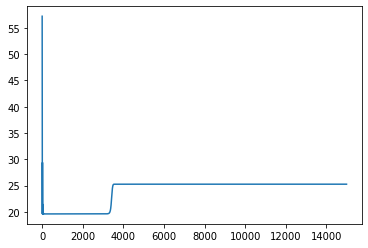

In [12]:
plot(history['cost'])

In [13]:
y_hat = nn2.predict(X_normed.T).T

In [24]:
np.linalg.norm(y_hat - y_normed)

1.1474297432739935

In [26]:
np.linalg.norm(y_normed.mean()-y_normed)

1.9630762480366915

0.41549405204124956


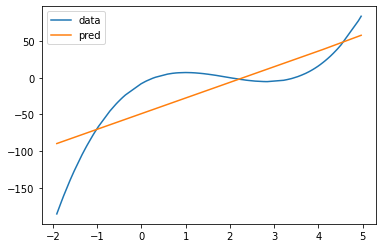

In [14]:
#y_hat = MinMaxScaler().fit_transform(y_hat.reshape(-1,1))
data['y_predicted'] = Y_train_scaler.inverse_transform(y_hat).reshape(-1,1)
plot(*zip(*sorted(zip(data.x, data.y))), label='data')
plot(*zip(*sorted(zip(data.x, data.y_predicted))), label='pred')
legend()
print(1 - np.linalg.norm(y_hat - y_normed)/(np.linalg.norm(y_normed.mean()-y_normed)))

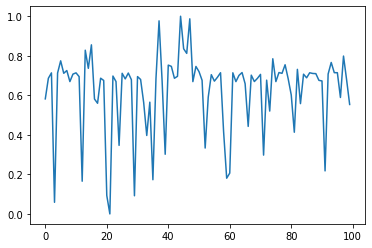

In [15]:
plot(y_normed)

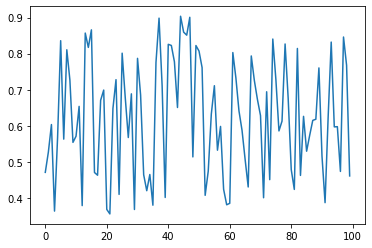

In [16]:
plot(y_hat)

In [17]:
grads, caches, weights, biases = history['grads'], history['caches'], history['weights'], history['biases']

In [18]:
grad, cache, weight, bias = grads[0], caches[0], weights[0], biases[0]

In [19]:
import graphviz

In [20]:
from src.visualization.visualize import ann_viz

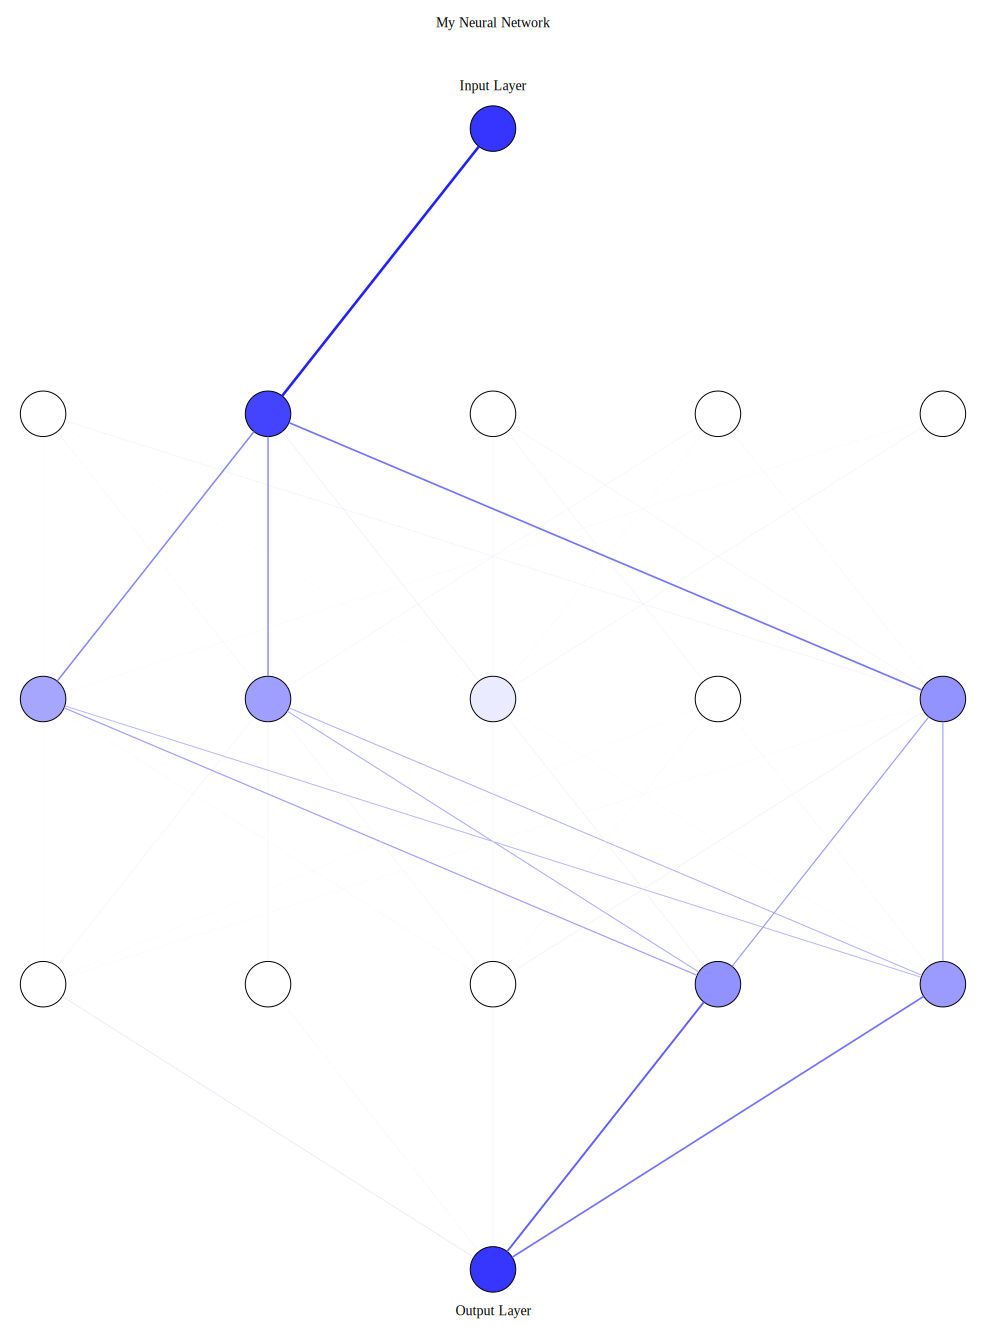

In [27]:
ann_viz(nn2, caches[-1], weights[-1], biases[-1], grads[-1], sample_id=30, format='svg', view=True, color_by_gradient=False)

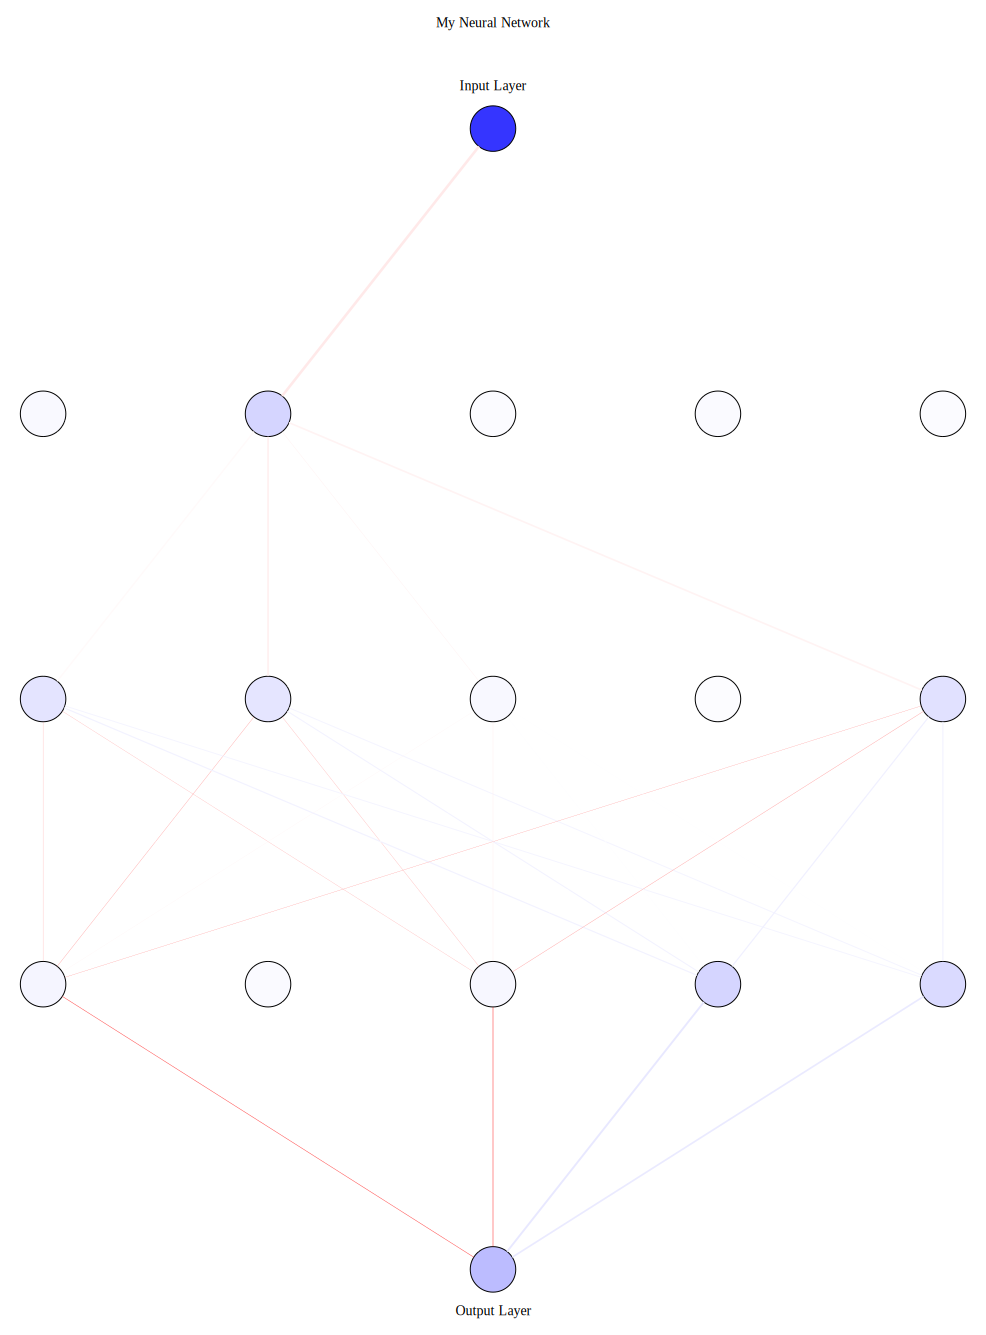

In [28]:
ann_viz(nn2, caches[-1], weights[-1], biases[-1], grads[-1], sample_id=30, format='svg', view=True, color_by_gradient=True)